# Data Split

Author: Sahngyoon Rhee

In this notebook, we will go over the basic concepts of data split (train-dev-test split). Data split is an integral part of developing any machine learning models, and we typicaly split a data into subsets: training dataset, development dataset (also called validation set), and test set. In some machine learning projects, the development dataset set may be left out so that we have two partitions of our data. 

In other notebooks, we shall also take a look at cross validation and feature selection (forward feature selection and backward feature selection). Cross validation allows us to use more data for both training and testing and is useful especially when we don't have a large amount of data. Feature selection allows us to select features that are most relevant in case we are limited in computational resources.

## How it works

In a typical machine learning project, a data is split into three groups: training dataset, development dataset (also called validation set), and test set.

Why do we do this? This is because, if we use all of the data in training a machine learning model, we won't be able to tell how the trained model performs on an unseen dataset, and because we want to find out which model performs best among a selection of various models.

To be concrete, suppose we have a dataset and we want to try ou various regression models, such as the Support Vector Regressor (SVR) or a Polynomial regression of various degrees or a decision tree regressor. In order to find the best-performing model (in terms of accuracy) and find out how accurate the model is, we first use the training dataset to train each model. We then apply each trained model to the validation set, getting accuracy scores of each of our model. We then mark the model with the highest validation-set-accuracy as the best performing model, and then we can calculate how well the best performing model actually performs by apply it to the test set.

Below, we shall implement the train-validation-test set using `sklearn`.

We first import the data and take a look at its description.

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Display the feature names
feature_names = data.feature_names
print("Feature Names:")
print(feature_names)

# Display the description of the dataset
print("\nDataset Description:")
print(data.DESCR)

print(f"We have {data.data.shape[0]} rows in our data")

Feature Names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Dataset Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable

We are using various feature variabes such as the median income, the age of the house, and average number of bedrooms, to create an ML model that estimates the median house value for various blocks in California districts, expressed in $\$100,000$. The dataset is from 1990 so it's outdated, but it will still be useful for demonstration. A block, as noted in the above description (`data.DESCR` result), "is the smallest geographical unit for which the U.S. 
Census Bureau publishes sample data (a block group typically has a populatio 
of 600 to 3,000 peopl."e)

Normally, we would do a data preprocessing first (i.e. handle missing values, duplicate rows, etc.), but as [the data likely has already been preprocessed by `sklearn` package](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), we dive straight into train-dev-test split.

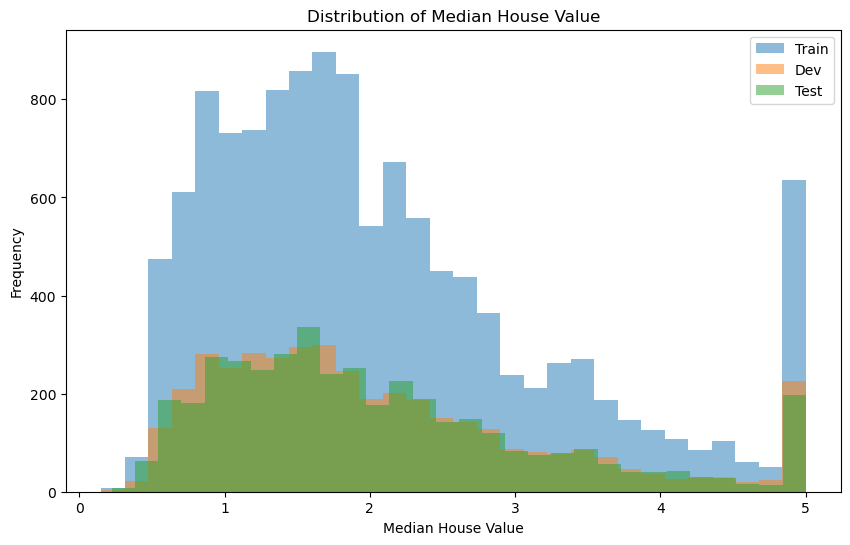

In [2]:
# Split the data into train, dev, and test sets (60-20-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size = .5)

# Standardize the features. Notice we fit the StandardScaler only once 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)

# Visualize the distribution of the target variable
plt.figure(figsize = (10, 6))
plt.hist(y_train, bins=30, alpha=.5, label='Train')
plt.hist(y_dev, bins=30, alpha=.5, label='Dev')
plt.hist(y_test, bins=30, alpha=.5, label='Test')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Median House Value')
plt.show()

Here, 60% of our data was set as the training dataset, 20% of our data was set as the development dataset (also called validation dataset), and 20% of our data was set as the testing dataset. 

This 60-20-20 split can be modified according to two factors, (1) the specific application of our data, and (2) the size of the given data. For example, suppose that, instead of $20,640$ number of rows (as we have), if we had the data from *all* blocks from all districts in the United States. We then would have a much larger dataset, perhaps with $1,000,000$ number of rows. Since having more data in the training set generally increases the accuracy of the model, and since we likely won't need to have $200,000$ rows just for determining which model works the best (i.e. in the validation set) nor for the testing set, it may be more than sufficient to have, say, about $50,000$ rows for the development set, another $50,000$ for the testing set, and use the rest for training. In other words, it wouldn't be a bad idea to do something like 90-5-5 split in such a relatively large dataset. However, if we were developing a commercial application in the marketing sector, say about ad-click prediction, we may be in a situation where improving the model accuracy by $0.01%$ may be significant - in this case, we may still want to have a large chunk of the data, say $20%$, of a given dataset for both development set and testing set, even as a given data may be huge.

Going back to our example, we see a trend in the historgrams: the median housing values are skewed to the right, with the outliers being blocks in Californian districts with median housing price as over $\$500,000$.

We now build three models: Suppose Vector Regression (`svm.SVR()`), a $2$nd degree polynomial (using `PolynomialFeatures(degree=2)` and `LinearRegression()`), and a Decision Tree Regressor (`DecisionTreeRegressor()`).

We will train all three models using the training dataset and compare their performances in the development set.

In [3]:
# Initialize the models
svr = SVR()
poly = PolynomialFeatures(degree = 2)
poly_reg = LinearRegression()
tree = DecisionTreeRegressor()

# Train and evaluate SVR
svr.fit(X_train, y_train)
y_dev_pred_svr = svr.predict(X_dev)
svr_mse = mean_squared_error(y_dev, y_dev_pred_svr)

# Train and evalue Polynomial Regression
X_train_poly = poly.fit_transform(X_train)
X_dev_poly = poly.transform(X_dev)
poly_reg.fit(X_train_poly, y_train)
y_dev_pred_poly = poly_reg.predict(X_dev_poly)
poly_mse = mean_squared_error(y_dev, y_dev_pred_poly)

# Train and evaluate Decision Tree Regressor
tree.fit(X_train, y_train)
y_dev_pred_tree = tree.predict(X_dev)
tree_mse = mean_squared_error(y_dev, y_dev_pred_tree)

Mean Squared Error for Support Vector Regressor (SVR) on dev set: 0.378
Mean Squared Error for Polynomial Regression MSE on dev set: 0.583
Mean Squared Error for Decision Tree Regressor MSE on dev set: 0.516


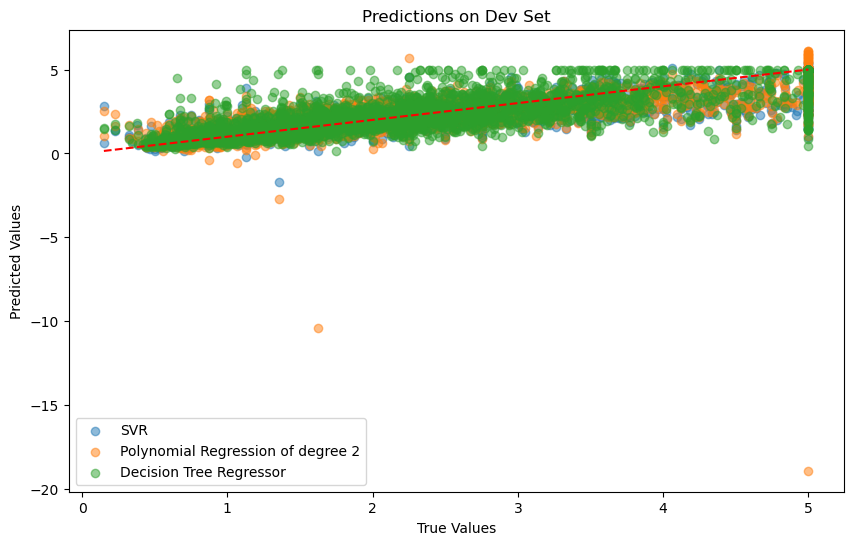

In [4]:
# Compare the models
print(f"Mean Squared Error for Support Vector Regressor (SVR) on dev set: {svr_mse:.3f}")
print(f"Mean Squared Error for Polynomial Regression MSE on dev set: {poly_mse:.3f}")
print(f"Mean Squared Error for Decision Tree Regressor MSE on dev set: {tree_mse:.3f}")

# Visualize the prediction on the dev set
plt.figure(figsize=(10,6))
plt.scatter(y_dev, y_dev_pred_svr, alpha=.5, label='SVR')
plt.scatter(y_dev, y_dev_pred_poly, alpha=.5, label='Polynomial Regression of degree 2')
plt.scatter(y_dev, y_dev_pred_tree, alpha=.5, label='Decision Tree Regressor')
plt.plot([min(y_dev), max(y_dev)], [min(y_dev), max(y_dev)], 
         color='red', linestyle='--') # Reference line for perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Predictions on Dev Set')
plt.show()

Now that we have the performances for all three models, we can decide on which model performs the best.

In [5]:
# Select the best model (lowest MSE)
best_model = min((svr_mse, 'SVR'), 
                 (poly_mse, 'Polynomial Regression of degree 2'),
                 (tree_mse, 'Decision Tree Regressor'))
print(f"Best model: {best_model[1]} with the Mean Square Error in the development set of about "
      f"{best_model[0]:.3f}")

Best model: SVR with the Mean Square Error in the development set of about 0.378


Notice that we **cannot** claim that the best model has a MSE of around .383. Why is this? This is because our dev MSE of .383 was tuned to the development set. In other words, even as we used the development set to pick which model likely will perform best, we still have used the development set MSE score to get the number .383.

We now calculate the true MSE score when our best performing model gets run on an unseen data.

Test MSE of the best model (SVR): 0.345


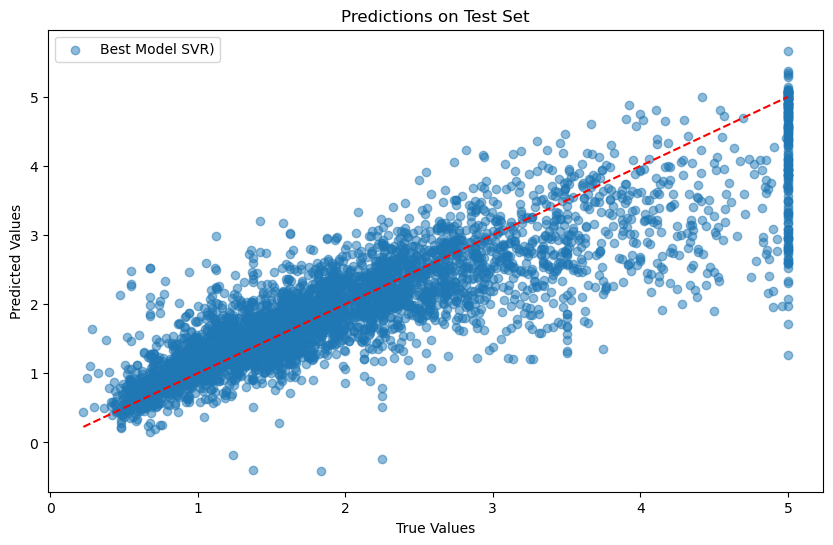

In [6]:
# Evaluate the best model on the test set
if best_model[1] == 'SVR':
    y_test_pred = svr.predict(X_test)
elif best_model[1] == 'Polynomial Regression of degree 2':
    X_test_poly = poly.transform(X_test)
    y_test_pred = poly_reg.predict(X_test_poly)
else:
    y_test_pred = tree.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE of the best model ({best_model[1]}): {test_mse:.3f}")

# Visualize the predictions on the test set
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_test_pred, alpha = 0.5,
            label = f'Best Model {best_model[1]})')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Predictions on Test Set')
plt.show()